In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SqlAlquemySelectMarketDataHandler import SqlAlquemySelectMarketDataHandler

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Selected 27 most important countries that covers
# around 98% of total weight of MSCI ACWI in years 1999 - 2024

selected_countries = [
    'United States', 'Japan', 'United Kingdom', 
    'Canada', 'France', 'Switzerland', 'Germany', 
    'Australia', 'Netherlands', 'Sweden', 
    'Hong Kong', 'Spain', 'Italy', 
    'Singapore', 'Denmark', 'Finland',
    'Belgium', 'Norway', 'China', 'Taiwan', 
    'India', 'Korea', 'Brazil', 'Russia',
    'South Africa', 'Mexico', 'Malaysia', 'ACWI']
len(selected_countries)

28

### ETF data in USD from Nasdaq exchange which have the highest coverage

In [3]:
sql_handler = SqlAlquemySelectMarketDataHandler()
etfs_in_usd = sql_handler.read_market_symbols('ETF in USD')

49 market symbols read


In [4]:
etfs = etfs_in_usd[etfs_in_usd['Country'].isin(selected_countries)]
etfs.index = etfs['Country']
etfs

,Code,Description,Country
Country,,,
ACWI,ACWI,iShares MSCI ACWI ETF,ACWI
Denmark,EDEN,iShares MSCI Denmark ETF,Denmark
Finland,EFNL,iShares MSCI Finland ETF,Finland
Norway,ENOR,iShares MSCI Norway ETF,Norway
Russia,ERUS,iShares MSCI Russia ETF,Russia
Australia,EWA,iShares MSCI Australia ETF,Australia
Canada,EWC,iShares MSCI Canada ETF,Canada
Sweden,EWD,iShares MSCI Sweden ETF,Sweden
Germany,EWG,iShares MSCI Germany ETF,Germany


In [5]:
df_etfs = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                       columns=selected_countries)

for country in selected_countries:
    symbol = etfs.loc[country]['Code']
    df_etfs.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
6320 market data read
3033 market data read
3033 market data read
6320 market data read
3034 market data read
3240 market data read
5948 market data read
3027 market data read
5977 market data read
5934 market data read
3338 market data read
5291 market data read
6320 market data read
6320 market data read
3998 market data read


In [6]:
df_etfs = df_etfs.astype(float).round(2)
df_etfs

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia,ACWI
1999-01-04,78.57,28.45,16.07,5.85,11.39,11.48,12.74,3.45,14.50,7.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.28,4.77,NaN
1999-01-05,79.47,28.28,16.21,5.94,11.45,11.64,12.61,3.45,14.70,7.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.32,4.95,NaN
1999-01-06,81.39,28.63,16.90,6.28,11.70,11.89,13.62,3.56,14.97,7.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.20,5.29,NaN
1999-01-07,80.99,28.80,16.60,6.19,11.61,11.81,12.68,3.63,14.53,8.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.13,5.21,NaN
1999-01-08,81.59,28.80,16.51,6.28,11.42,11.81,12.71,3.63,14.36,7.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.93,5.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,473.65,63.33,32.92,36.43,39.13,47.45,29.52,24.24,44.25,39.43,...,39.29,44.47,48.36,63.97,34.62,8.06,40.75,67.81,21.16,NaN
2023-12-26,475.65,63.31,33.09,36.83,39.37,47.70,29.69,24.44,44.66,39.60,...,39.57,45.41,48.53,64.27,35.15,8.06,40.97,68.31,21.11,101.67
2023-12-27,476.51,63.66,33.22,36.87,39.51,48.07,29.86,24.56,44.87,39.93,...,39.53,45.86,48.84,64.85,35.27,8.06,41.97,68.46,21.16,101.96
2023-12-28,476.69,64.04,33.05,36.70,39.13,47.86,29.66,24.49,44.64,39.75,...,40.46,46.03,49.02,65.98,35.11,8.06,40.94,67.96,21.21,101.96


In [19]:
z_score_scaler = lambda x: (x - x.mean()) / x.std()
df_etfs_norm = df_etfs.apply(z_score_scaler)
df_etfs_norm = df_etfs_norm.round(2)
df_etfs_norm

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia,ACWI
1999-01-04,-0.78,-1.10,-1.02,-1.66,-1.13,-0.93,-0.86,-1.50,-0.59,-1.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.74,-1.81,NaN
1999-01-05,-0.77,-1.11,-1.00,-1.65,-1.12,-0.91,-0.88,-1.50,-0.57,-1.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.73,-1.79,NaN
1999-01-06,-0.75,-1.08,-0.88,-1.61,-1.09,-0.89,-0.73,-1.48,-0.54,-1.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.74,-1.75,NaN
1999-01-07,-0.76,-1.07,-0.93,-1.62,-1.10,-0.90,-0.87,-1.47,-0.59,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.75,-1.76,NaN
1999-01-08,-0.75,-1.07,-0.95,-1.61,-1.13,-0.90,-0.86,-1.47,-0.60,-1.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.76,-1.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,2.74,1.95,1.81,1.96,2.58,2.17,1.61,1.89,2.33,2.01,...,-0.79,1.92,2.21,1.07,0.80,-1.97,0.51,2.04,0.24,NaN
2023-12-26,2.75,1.95,1.84,2.01,2.61,2.19,1.63,1.92,2.37,2.02,...,-0.77,2.00,2.24,1.09,0.85,-1.97,0.53,2.07,0.23,2.08
2023-12-27,2.76,1.98,1.86,2.02,2.63,2.22,1.66,1.94,2.39,2.06,...,-0.77,2.04,2.27,1.12,0.86,-1.97,0.62,2.08,0.24,2.10
2023-12-28,2.76,2.01,1.83,2.00,2.58,2.20,1.63,1.93,2.37,2.04,...,-0.69,2.05,2.30,1.18,0.85,-1.97,0.52,2.05,0.24,2.10


In [9]:
for country in df_etfs.columns:    
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

Denmark 2012-01-26 00:00:00
Finland 2012-01-26 00:00:00
Norway 2012-01-24 00:00:00
China 2011-03-31 00:00:00
Taiwan 2000-06-23 00:00:00
India 2012-02-03 00:00:00
Korea 2000-05-12 00:00:00
Brazil 2000-07-14 00:00:00
Russia 2010-11-09 00:00:00
South Africa 2003-02-07 00:00:00
ACWI 2008-03-28 00:00:00


10 countries and ACWI index have incomplete ETF data

In [10]:
for country in df_etfs.columns:
    last_valid = df_etfs[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Stock indices for missing data

In [90]:
# Hang Seng is much more similar to MSCI China ETF than Shanghai composite

stock_indices = sql_handler.read_market_symbols('Stock Index')
stock_indices = stock_indices[stock_indices['Country'].isin(
    ['Taiwan', 'India', 'Korea', 'Brazil', 'Russia', 'Hong Kong', 
     'Denmark', 'Finland', 'Norway', 'South Africa'])]
stock_indices.index = stock_indices['Country']
stock_indices

45 market symbols read


,Code,Description,Country
Country,,,
India,^BSESN,S&P BSE Sensex,India
Brazil,^BVSP,BOVESPA,Brazil
Hong Kong,^HSI,Hang Seng,Hong Kong
Korea,^KS11,KOSPI,Korea
Finland,^OMXH25,OMX Helsinki 25,Finland
Taiwan,^TWII,TSEC Weighted,Taiwan
Russia,IMOEX.ME,MOEX,Russia
South Africa,JTOPI,FTSE JSE 40,South Africa
Norway,OBX,Olso OBX,Norway


In [67]:
df_stock_indices = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                columns=stock_indices.index)

for country in stock_indices.index:
    symbol = stock_indices.loc[country]['Code']
    df_stock_indices.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

6547 market data read
6547 market data read
6547 market data read
6547 market data read
5979 market data read
6547 market data read
6547 market data read
6547 market data read
6371 market data read
5998 market data read


In [68]:
df_stock_indices = df_stock_indices.astype(float).round(2)
df_stock_indices

Country,India,Brazil,Hong Kong,Korea,Finland,Taiwan,Russia,South Africa,Norway,Denmark
1999-01-04,3122.04,6942.0,9809.17,587.57,NaN,6152.41,45.60,4542.55,NaN,NaN
1999-01-05,3149.06,7111.0,9891.06,576.78,NaN,6152.41,45.60,4565.49,NaN,NaN
1999-01-06,3205.68,7331.0,10233.80,612.36,NaN,6199.89,46.79,4822.16,NaN,NaN
1999-01-07,3299.09,6954.0,10693.57,637.59,NaN,6404.29,46.79,4866.61,NaN,NaN
1999-01-08,3397.84,6781.0,10722.70,626.33,NaN,6421.73,46.79,4957.42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,71106.96,132753.0,16340.41,2599.51,4521.38,17604.84,3092.58,67966.89,1185.04,2267.75
2023-12-26,71336.80,133533.0,16624.84,2602.59,4545.88,17751.73,3094.72,67966.89,1185.04,2266.57
2023-12-27,72038.43,134194.0,16624.84,2613.50,4545.88,17891.50,3097.49,70273.03,1193.95,2266.57
2023-12-28,72410.38,134185.0,17043.53,2655.28,4529.24,17910.37,3101.99,70076.25,1191.90,2283.04


In [69]:
for country in df_stock_indices.columns:    
    first_valid = df_stock_indices[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

Finland 2001-03-08 00:00:00
Norway 1999-09-07 00:00:00
Denmark 2001-02-09 00:00:00


In [70]:
for country in df_stock_indices.columns:
    last_valid = df_stock_indices[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Currency rates to adjust convert indexes to USD

In [71]:
currency_rates_usd = sql_handler.read_market_symbols('Currency Rate USD')
currency_rates_usd.index = currency_rates_usd['Country']
currency_rates_usd

9 market symbols read


,Code,Description,Country
Country,,,
Brazil,BRLUSD=X,Brazilian Real,Brazil
Denmark,DKKUSD=X,Danish Krone,Denmark
Hong Kong,HKDUSD=X,Hong Kong Dollar,Hong Kong
India,INRUSD=X,Indian Rupee,India
Korea,KRWUSD=X,South Korean Won,Korea
Norway,NOKUSD=X,Norwegian Krone,Norway
Russia,RUBUSD=X,Russian Ruble,Russia
Taiwan,TWDUSD=X,New Taiwan Dollar,Taiwan
South Africa,ZARUSD=X,South African Rand,South Africa


In [72]:
df_currency_rates = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                 columns=currency_rates_usd.index)

for country in currency_rates_usd.index:
    symbol = currency_rates_usd.loc[country]['Code']
    df_currency_rates.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

df_currency_rates.loc[:, 'Finland'] = sql_handler.read_market_data('EURUSD=X')['Value']
df_currency_rates = df_currency_rates.astype(float)
df_currency_rates

6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6520 market data read
6550 market data read


Country,Brazil,Denmark,Hong Kong,India,Korea,Norway,Russia,Taiwan,South Africa,Finland
1999-01-04,0.8283,0.1588,0.1291,0.0219,0.0008,0.1339,0.0466,0.0312,0.1705,1.1827
1999-01-05,0.8278,0.1580,0.1291,0.0219,0.0008,0.1347,0.0440,0.0312,0.1734,1.1764
1999-01-06,0.8272,0.1560,0.1291,0.0219,0.0008,0.1342,0.0430,0.0312,0.1759,1.1618
1999-01-07,0.8263,0.1573,0.1291,0.0219,0.0008,0.1359,0.0432,0.0312,0.1733,1.1709
1999-01-08,0.8263,0.1555,0.1291,0.0219,0.0008,0.1353,0.0428,0.0312,0.1713,1.1575
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.2053,0.1478,0.1280,0.0120,0.0008,0.0983,0.0109,0.0322,0.0542,1.1000
2023-12-26,0.2053,0.1478,0.1280,0.0120,0.0008,0.0983,0.0109,0.0321,0.0542,1.1000
2023-12-27,0.2077,0.1481,0.1281,0.0120,0.0008,0.0987,0.0109,0.0323,0.0536,1.1000
2023-12-28,0.2072,0.1490,0.1280,0.0120,0.0008,0.0990,0.0109,0.0324,0.0545,1.1100


### MSCI indexes for missing ETF data

In [22]:
msci_indices = sql_handler.read_market_symbols('MSCI Index')
msci_indices.index = msci_indices['Country']
msci_indices

10 market symbols read


,Code,Description,Country
Country,,,
ACWI,MSCI_ACWI,MSCI ACWI Standard (Large+Mid Cap),ACWI
Brazil,MSCI_BRA,MSCI Brazil Standard (Large+Mid Cap),Brazil
China,MSCI_CHI,MSCI China Standard (Large+Mid Cap),China
Denmark,MSCI_DEN,MSCI Denmark Standard (Large+Mid Cap),Denmark
Finland,MSCI_FIN,MSCI Finland Standard (Large+Mid Cap),Finland
India,MSCI_IND,MSCI India Standard (Large+Mid Cap),India
Korea,MSCI_KOR,MSCI Korea Standard (Large+Mid Cap),Korea
Norway,MSCI_NOR,MSCI Norway Standard (Large+Mid Cap),Norway
South Africa,MSCI_SA,MSCI South Africa Standard (Large+Mid Cap),South Africa


In [23]:
df_msci_indices = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                columns=msci_indices.index)

for country in msci_indices.index:
    symbol = msci_indices.loc[country]['Code']
    df_msci_indices.loc[:, country] = sql_handler.read_market_data(symbol)['Value']

6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read
6521 market data read


In [24]:
df_msci_indices = df_msci_indices.astype(float).round(2)
df_msci_indices

Country,ACWI,Brazil,China,Denmark,Finland,India,Korea,Norway,South Africa,Taiwan
1999-01-04,276.12,546.00,29.78,2000.72,456.04,82.22,88.74,1000.13,127.49,232.02
1999-01-05,278.92,549.24,29.46,1994.98,461.88,83.25,92.87,1016.82,130.77,221.98
1999-01-06,284.22,562.39,30.29,1985.66,459.39,84.91,95.44,1043.26,140.87,225.84
1999-01-07,283.46,541.31,30.97,1940.68,470.27,87.23,100.89,1026.77,137.94,234.80
1999-01-08,283.17,531.09,30.60,1917.44,468.74,90.01,95.97,1052.26,142.38,235.91
...,...,...,...,...,...,...,...,...,...,...
2023-12-25,721.30,1778.91,52.90,21617.38,504.50,905.53,491.61,2416.04,395.66,615.92
2023-12-26,723.78,1802.53,52.91,21646.80,505.14,909.55,496.52,2418.46,392.51,623.80
2023-12-27,727.29,1811.26,53.77,21782.83,511.53,914.81,501.07,2475.32,412.58,633.35
2023-12-28,728.75,1806.41,55.27,21948.23,509.83,922.07,511.08,2449.48,407.65,638.66


In [25]:
for country in df_msci_indices.columns:    
    first_valid = df_msci_indices[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

In [26]:
for country in df_msci_indices.columns:
    last_valid = df_msci_indices[country].last_valid_index()
    if not str(last_valid).startswith('2023-12-29'):
        print(country, last_valid)

### Comparing tracking error between ETF and different indices

In [88]:
def compare_data_with_indices(country, norm_date):
    plt.figure(figsize=(20,6))

    etf_norm = df_etfs_norm[country]
    plt.plot(etf_norm, label='ETF')
    
    plt.vlines(x=pd.to_datetime(norm_date), 
               ymin=-3, ymax=3, color='b', linestyle='--', 
               label='First valid ETF date')

    if country != 'ACWI':    
        if country == 'China':
            index = df_stock_indices['Hong Kong']
            currency_rate = df_currency_rates['Hong Kong']
        else:
            index = df_stock_indices[country]
            currency_rate = df_currency_rates[country]

        index_adj = index*currency_rate
        index_adj_mean = index_adj[norm_date:].mean()
        index_adj_std = index_adj[norm_date:].std()
        index_adj_norm = (index_adj - index_adj_mean)/index_adj_std
        index_adj_norm = index_adj_norm.round(2)
        plt.plot(index_adj_norm, label='Stock Index currency adj')
        
        index_mean = index[norm_date:].mean()
        index_std = index[norm_date:].std()
        index_norm = (index - index_mean)/index_std
        index_norm = index_norm.round(2)
        plt.plot(index_norm, label='Stock Index original')
        
        tracking_error = np.std(index_adj_norm[norm_date:] - etf_norm)
    else:
        tracking_error = np.float32(9.99)
    
    if country != 'Russia':
        msci_index = df_msci_indices[country]
        msci_index_mean = msci_index[norm_date:].mean()
        msci_index_std = msci_index[norm_date:].std()
        msci_index_norm = (msci_index - msci_index_mean)/msci_index_std
        msci_index_norm = msci_index_norm.round(2)
        plt.plot(msci_index_norm, label='MSCI Index')
        
        msci_tracking_error = np.std(msci_index_norm[norm_date:] - etf_norm)
    else:
        msci_tracking_error = np.float32(9.99)

    plt.title(country)

    plt.legend()
    plt.show()

    print('Stock index tracking error:', tracking_error)    
    print('MSCI tracking error:', msci_tracking_error)
    if tracking_error < msci_tracking_error:
        if (str(df_stock_indices[country].first_valid_index()).startswith('1999-01-04')):
            print('Better Stock index')
        else:
            print('Stock index misses start data - better MSCI index')
    else:
        print('Better MSCI index')


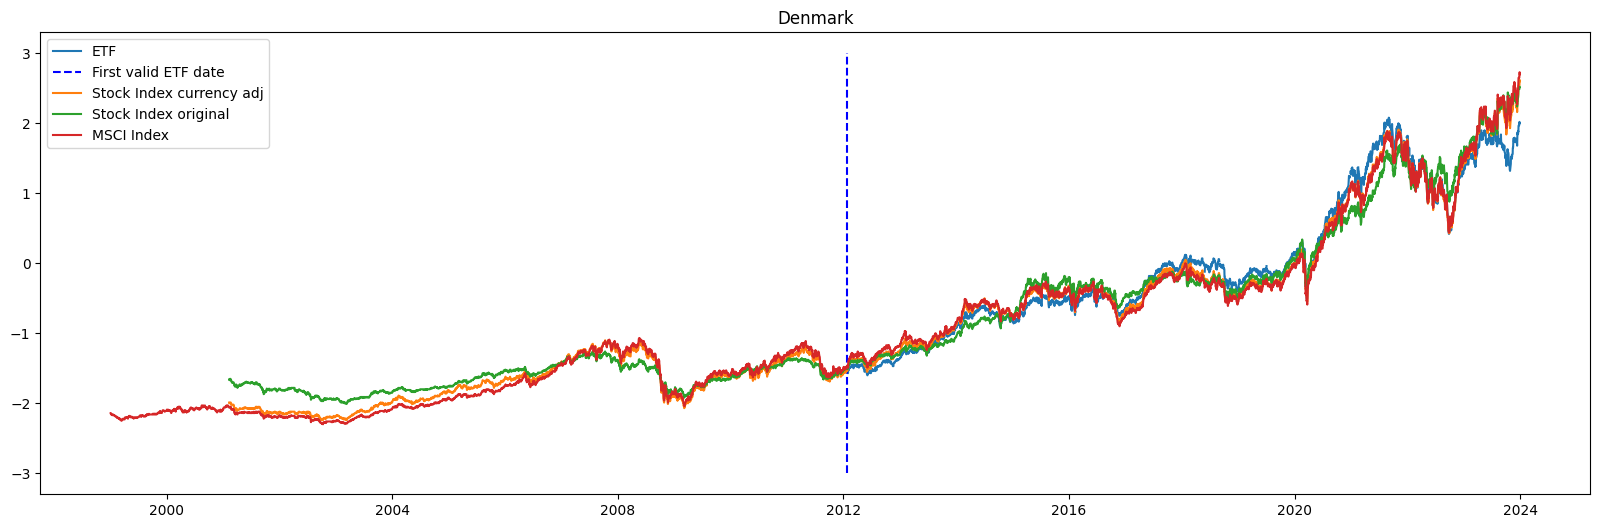

Stock index tracking error: 0.16373249774837073
MSCI tracking error: 0.20046385351921814
Stock index misses start data - better MSCI index


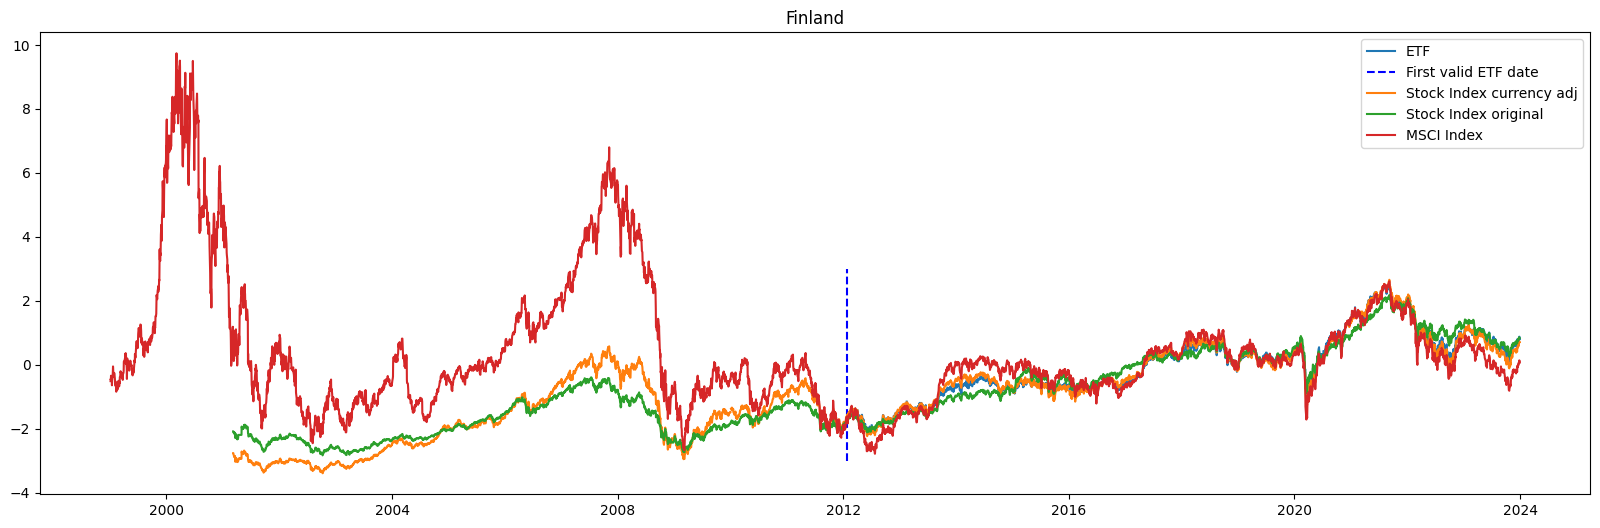

Stock index tracking error: 0.10966162373308912
MSCI tracking error: 0.3671323581630258
Stock index misses start data - better MSCI index


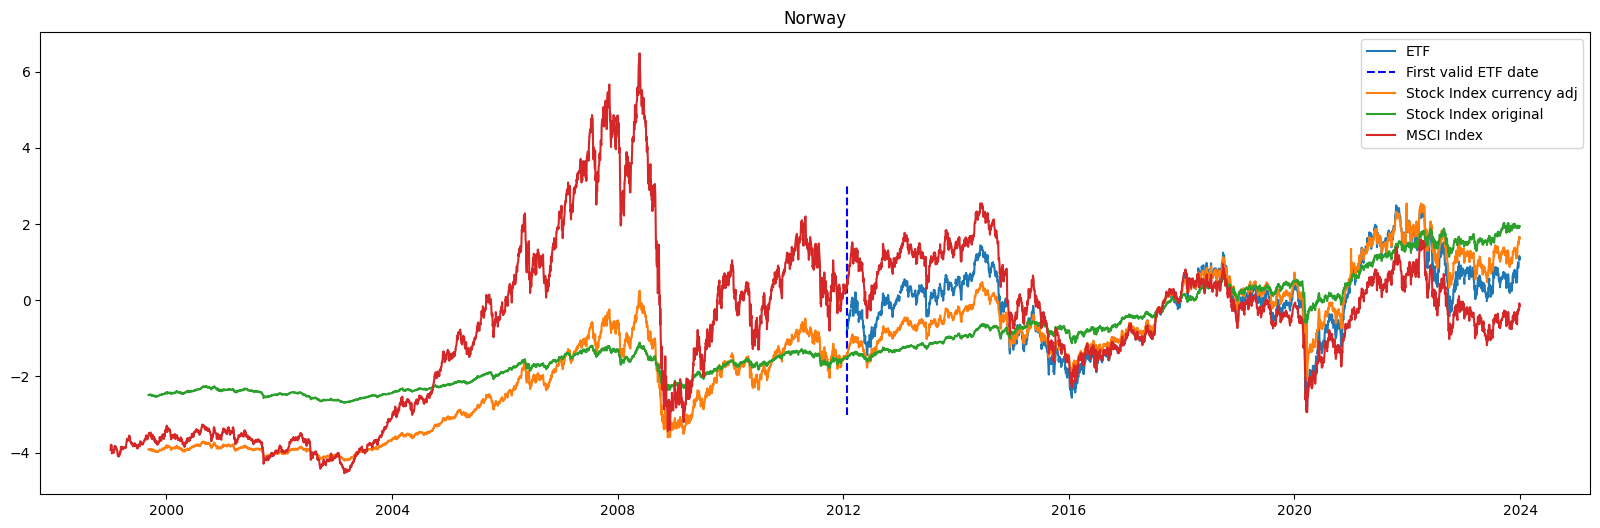

Stock index tracking error: 0.46823027747994794
MSCI tracking error: 0.7746090896481456
Stock index misses start data - better MSCI index


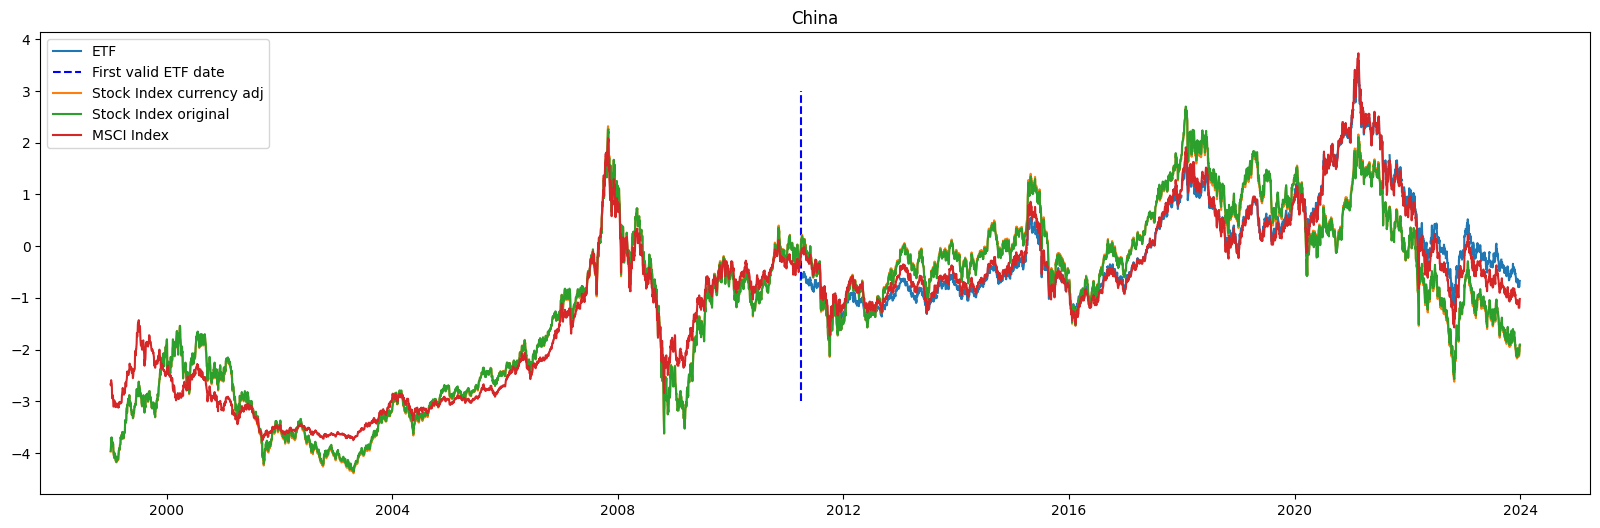

Stock index tracking error: 0.7302532471617272
MSCI tracking error: 0.1883795024119913
Better MSCI index


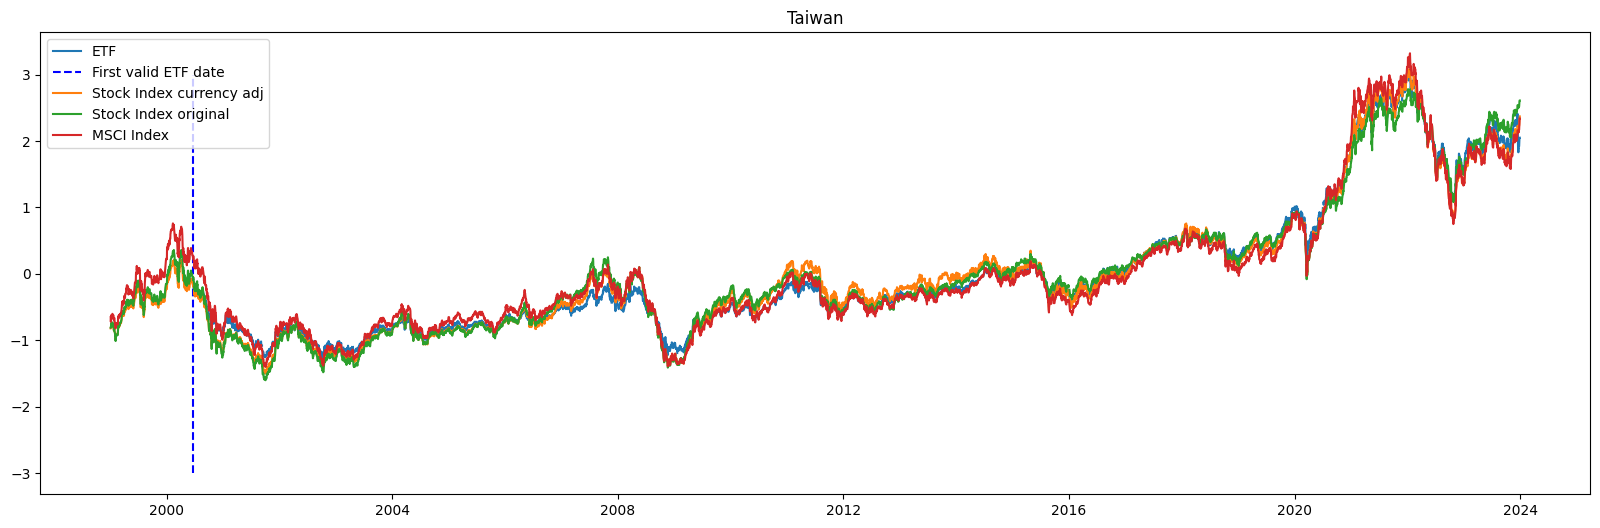

Stock index tracking error: 0.12445654289961772
MSCI tracking error: 0.13162243778883748
Better Stock index


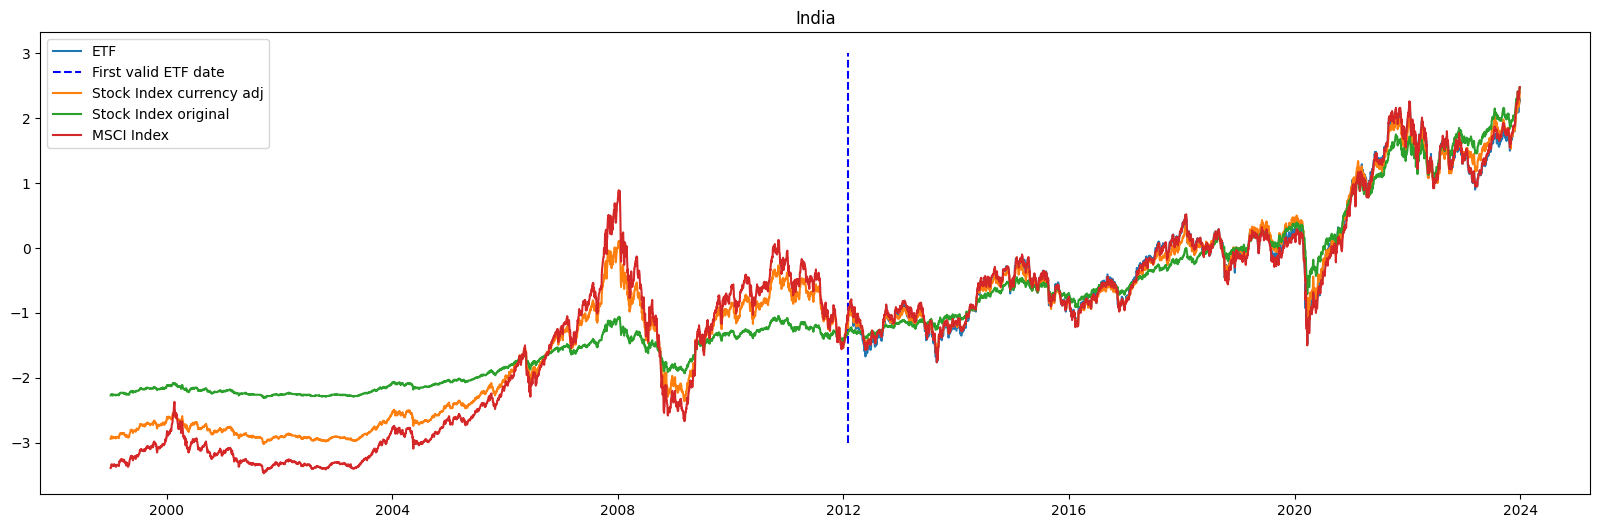

Stock index tracking error: 0.09983283539723732
MSCI tracking error: 0.062429165135166144
Better MSCI index


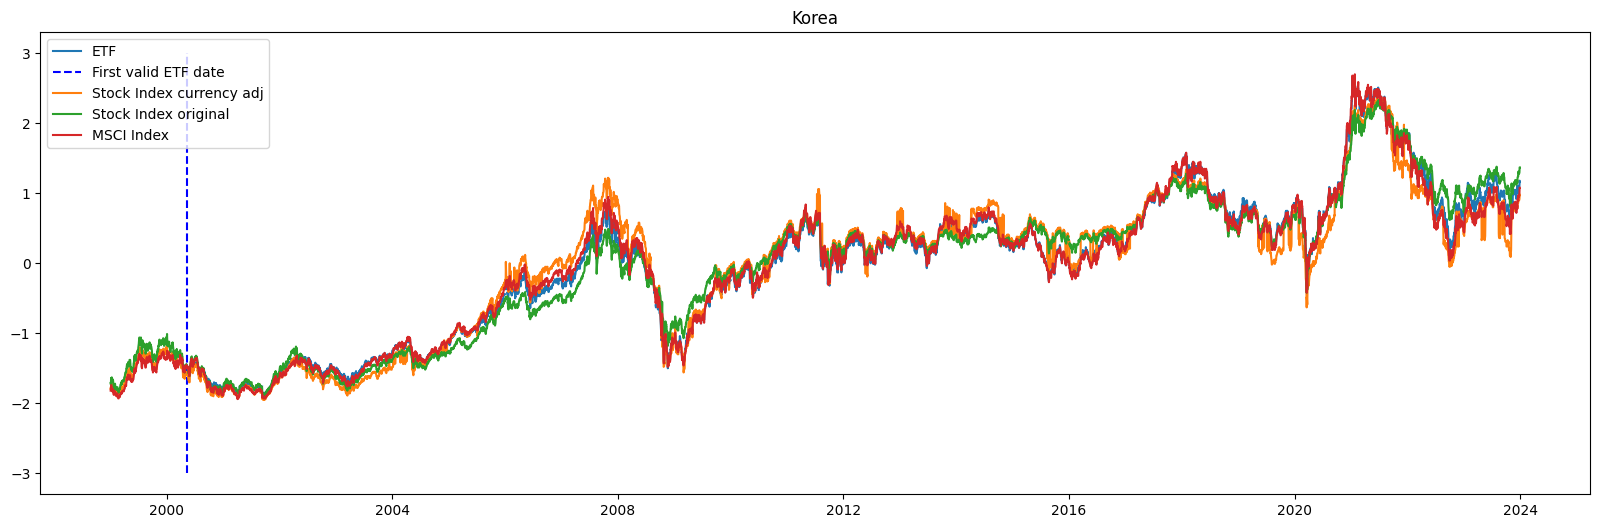

Stock index tracking error: 0.20299711212520927
MSCI tracking error: 0.07472597749115287
Better MSCI index


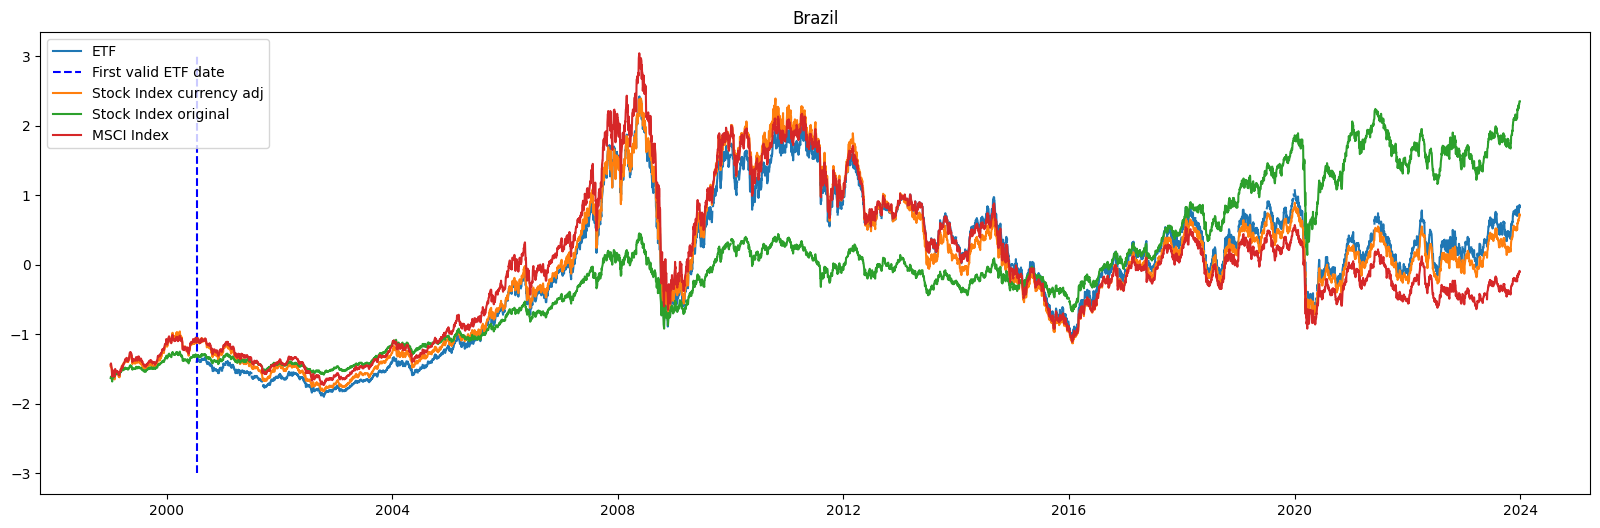

Stock index tracking error: 0.16138613387214243
MSCI tracking error: 0.3265485730859272
Better Stock index


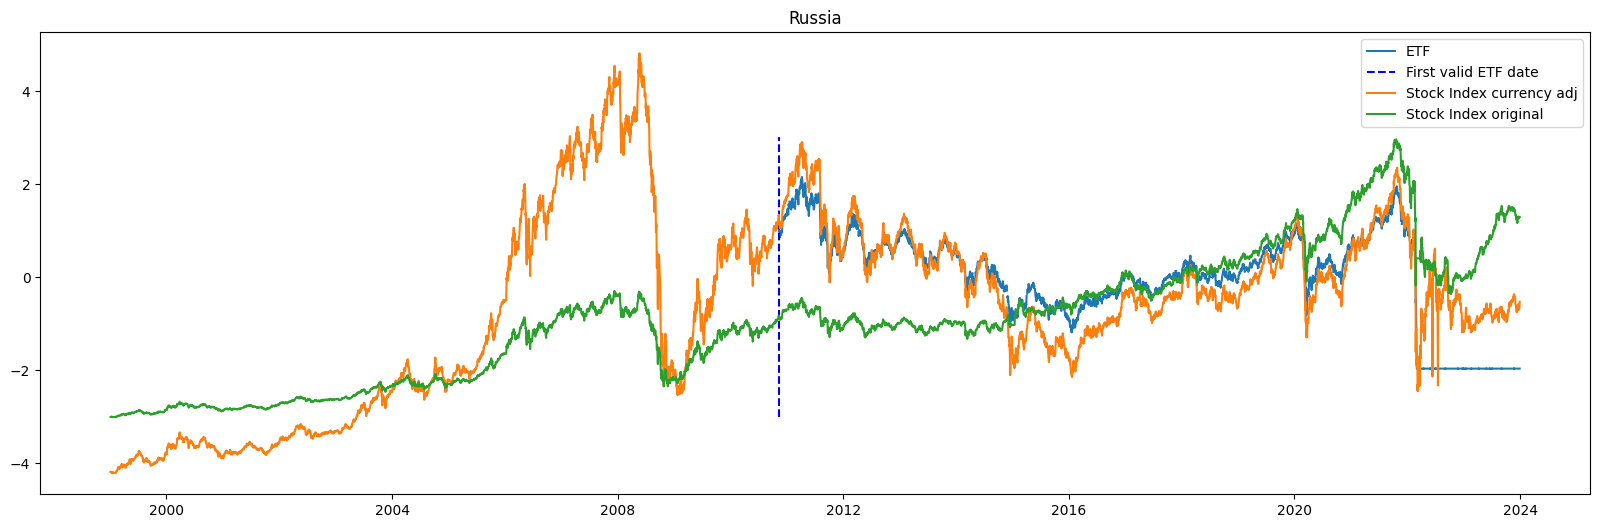

Stock index tracking error: 0.6309997013152406
MSCI tracking error: 9.99
Better Stock index


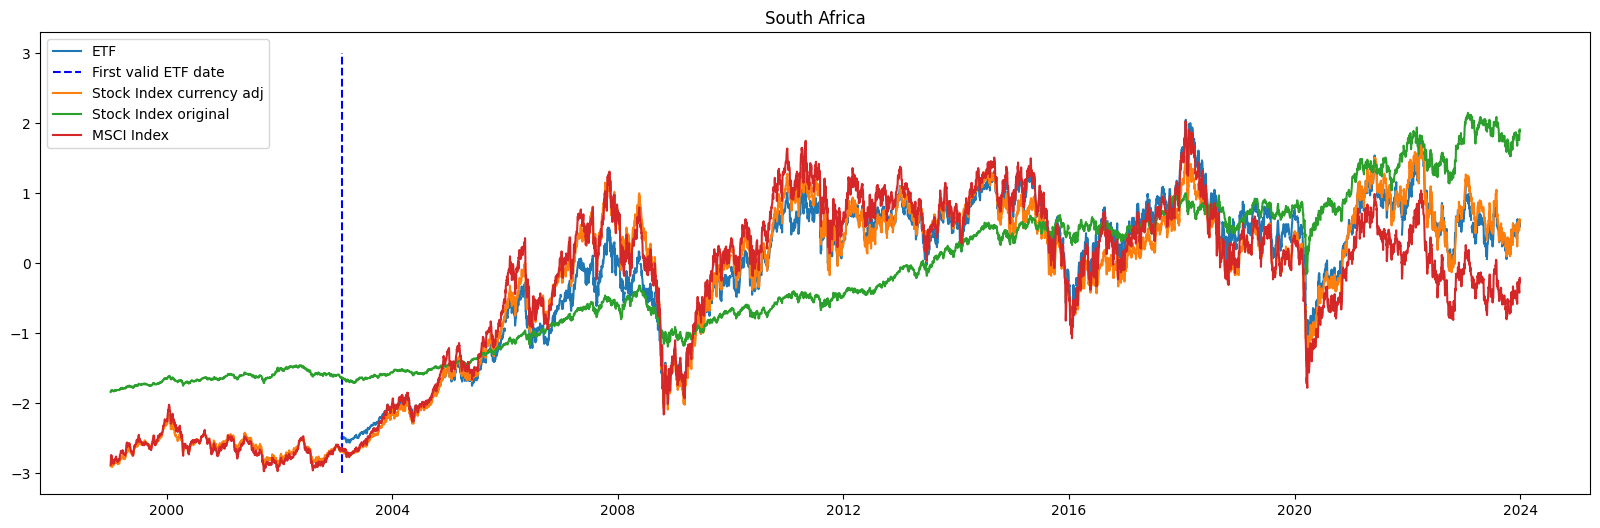

Stock index tracking error: 0.2812488586379918
MSCI tracking error: 0.3960068748716751
Better Stock index


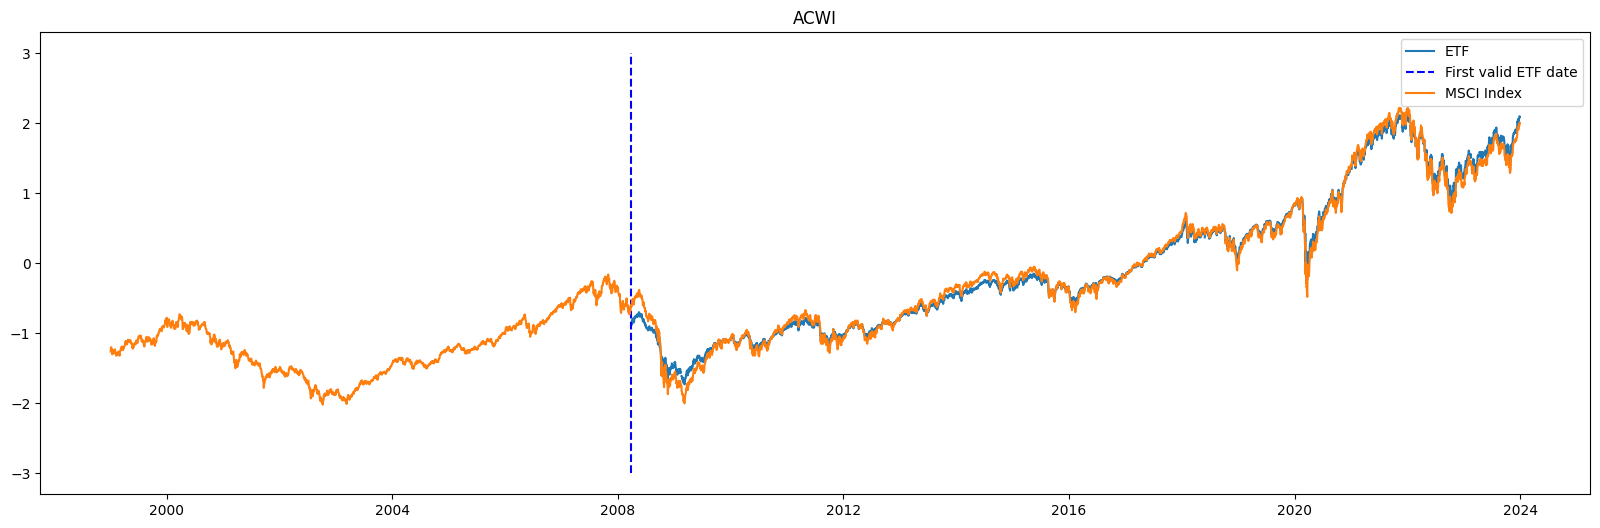

Stock index tracking error: 9.99
MSCI tracking error: 0.08424050102165392
Better MSCI index


In [89]:
for country in df_etfs.columns:
    first_valid = df_etfs[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        compare_data_with_indices(country, first_valid)

### Creating synthetic ETF data with index values adjusted with currency rates to USD

In [ ]:
df_synthetic_etfs = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-29', freq='B'),
                                 columns=['China', 'Taiwan', 'India', 'Korea',
                                          'Norway', 'Denmark', 'Finland', 'ACWI',
                                          'Brazil', 'Russia', 'South Africa'])

In [ ]:
countries_from_stock_indices = ['Brazil', 'Russia', 'South Africa']

In [91]:
# TODO use correct normalization/denormalization

def fill_missing_etf_data(country, norm_date):    
    index = df_stock_indices[country]
    currency_rate = df_currency_rates[country]

    index_adj = index[:norm_date]*currency_rate[:norm_date] 
    index_adj_norm = index_adj/index_adj[norm_date]
    index_adj_norm = index_adj_norm.round(2)

    etf = df_etfs[country]
    synthetic_etf = index_adj_norm*etf[norm_date]
    synthetic_etf = synthetic_etf.round(2)
    df_synthetic_etfs[country].loc[:norm_date] = synthetic_etf

In [ ]:
for country in df_synthetic_etfs.columns:
    first_valid = df_etfs[country].first_valid_index().strftime("%Y-%m-%d")
    if not first_valid.startswith('1999-01-04'):
        print(country, first_valid)
        fill_missing_etf_data(country, first_valid)

df_synthetic_etfs = df_synthetic_etfs.astype(float)
df_synthetic_etfs

### Save synthetic ETFs to the db

In [ ]:
from SqlAlquemyInsertMarketDataHandler import SqlAlquemyInsertMarketDataHandler

In [ ]:
def save_to_db(historic_data, category):
    sql_handler = SqlAlquemyInsertMarketDataHandler()

    for country in historic_data.columns:     
            print(country, end='')   
            values = historic_data[country].dropna()
            symbol_code = sql_handler.get_symbol_code(category, country)
            if (len(values) > 0) and symbol_code != '':
                sql_handler.save_to_db(symbol_code, values)
            else:
                print(' - skipped')

In [ ]:
# save_to_db(df_synthetic_etfs, 'Synthetic ETF in USD')